# Unsupervised Learning in Python

Run the hidden code cell below to import the data used in this course.

In [1]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats 

# Import the course datasets 
grains = pd.read_csv('datasets/grains.csv')
fish = pd.read_csv('datasets/fish.csv', header=None)
wine = pd.read_csv('datasets/wine.csv')
eurovision = pd.read_csv('datasets/eurovision-2016.csv')
stocks = pd.read_csv('datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
digits = pd.read_csv('datasets/lcd-digits.csv', header=None)




## Unsupervised Learning

Unsupervised learning is a type of machine learning where the model learns patterns and relationships in the data without any explicit labels or target variables. In unsupervised learning, the goal is to explore and discover the inherent structure or patterns in the data.

Unlike supervised learning, where the model is trained on labeled data to make predictions or classifications, unsupervised learning algorithms work on unlabeled data and aim to find hidden patterns, groupings, or clusters in the data.

Some common techniques used in unsupervised learning include clustering, dimensionality reduction, and anomaly detection.


## K-Means Clustering

K-means clustering is a popular unsupervised learning algorithm used to partition a dataset into K distinct clusters. The goal of K-means clustering is to minimize the sum of squared distances between the data points and their corresponding cluster centroids.

The algorithm works as follows:

1. Randomly initialize K cluster centroids.
2. Assign each data point to the nearest centroid based on the Euclidean distance.
3. Update the centroids by calculating the mean of all data points assigned to each cluster.
4. Repeat steps 2 and 3 until convergence (when the centroids no longer change significantly).

K-means clustering is an iterative algorithm that aims to find the optimal cluster centroids that minimize the within-cluster sum of squares (WCSS). The WCSS is a measure of the compactness of the clusters, and a lower WCSS indicates better clustering.

K-means clustering is widely used in various applications, such as customer segmentation, image compression, and anomaly detection.

```
# Import KMeans, py.plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)


# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D',s=50)
plt.show()

```

![image](image.png)


## Evaluating Clustering Models

Evaluating clustering models is an important step in assessing the quality and performance of the clustering algorithms. It helps in understanding how well the clustering algorithm has performed and whether the clusters formed are meaningful and useful.

- **Inertia**: Measures the how spread out the clusters are, low values indicate better clustering. Choose the "elbow" of an intertia plot to determine the trade off between accuracy and number of clusters.

```
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
```
![image-3](image-3.png)

There are several other evaluation metrics that can be used to evaluate clustering models. Some commonly used metrics include:

- **Silhouette Coefficient**: Measures how well each sample in a cluster is matched to its own cluster compared to other clusters. A higher value indicates better clustering.

- **Calinski-Harabasz Index**: Measures the ratio of between-cluster dispersion to within-cluster dispersion. A higher value indicates better clustering.

- **Davies-Bouldin Index**: Measures the average similarity between each cluster and its most similar cluster. A lower value indicates better clustering.

- **Rand Index**: Measures the similarity between two data clusterings. A higher value indicates better clustering.

It is important to choose the appropriate evaluation metric based on the specific requirements and characteristics of the dataset and the clustering task at hand.


## Evaluating the Grain Clustering:

In [4]:
grains.head()

,0,1,2,3,4,5,6,variety_number,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama wheat


In [8]:
# Import KMeans, py.plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

samples = grains.iloc[: , :7]
varieties = grains["variety"]

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

                     

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


## Importance of Feature Scaling in Clustering

Feature scaling is an important step in clustering algorithms because it helps to ensure that all features are on a similar scale. Clustering algorithms, such as K-means, are distance-based algorithms that calculate the similarity between data points based on the distance between them.

If the features have different scales, the clustering algorithm may give more importance to features with larger scales, leading to biased results. By scaling the features, we can bring them to a similar range and prevent any single feature from dominating the clustering process.

Feature scaling also helps to improve the convergence speed and performance of clustering algorithms. It can prevent numerical instability and ensure that the algorithm converges to an optimal solution.

```Normalizer()``` is similar to ```StandardScaler()``` except it rescales each sample independently of the other.

In [8]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd


# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

samples = fish.iloc[:,1:]
species = fish[0]

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels,'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1           33     0      1      0
2            0    17      0      0
3            0     0      0     13


In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


## Hierarchical Clustering

Hierarchical clustering is a method of clustering data points based on their similarity. It is an unsupervised learning technique that aims to create a hierarchy of clusters, where each cluster contains similar data points.

There are two main types of hierarchical clustering:

1. Agglomerative Hierarchical Clustering: This method starts with each data point as a separate cluster and then iteratively merges the closest clusters until a single cluster is formed.

2. Divisive Hierarchical Clustering: This method starts with all data points in a single cluster and then iteratively splits the cluster into smaller clusters until each data point is in its own cluster.

Hierarchical clustering can be visualized using a dendrogram, which is a tree-like diagram that shows the hierarchical relationships between clusters.

The choice of distance metric and linkage method (e.g., complete, single, average) can affect the results of hierarchical clustering.

Hierarchical clustering is useful for exploring the structure of the data and identifying natural groupings or clusters within the data.


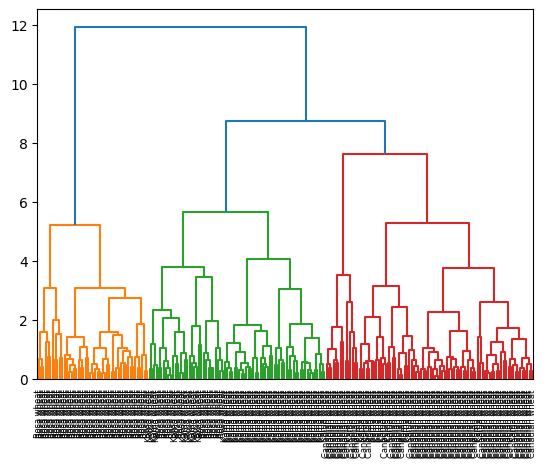

In [14]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

samples = grains.iloc[:, :7]
varieties = grains["variety"]


# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties.values,  # Use .values to access the values of the Series
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

```
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()
```
![image-4](image-4.png)


```
# Perform the necessary imports
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

samples = grains.iloc[: , :7]
varieties = grains["variety"].values

# Calculate the linkage: mergings
mergings = linkage(samples,method='single')

# Use fcluster to extract labels: labels
labels = fcluster(mergings,1,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0

```



## T-SNE

T-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that is commonly used for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D. It is particularly useful for visualizing complex datasets with non-linear relationships.

T-SNE works by modeling the similarity between pairs of data points in the high-dimensional space and the low-dimensional space. It aims to preserve the local structure of the data, meaning that nearby points in the high-dimensional space should be represented as nearby points in the low-dimensional space.

The algorithm starts by randomly placing the data points in the low-dimensional space. It then iteratively adjusts the positions of the points based on their similarities in the high-dimensional space. The similarities are typically measured using a Gaussian kernel.

T-SNE is widely used in various fields, including machine learning, data visualization, and exploratory data analysis.


```
# Import TSNE
from sklearn.manifold import TSNE 

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()
```
![image-7](image-7.png)

![image-8](image-8.png)

```
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

```
![image-9](image-9.png)


## Dimension Reduction using PCA

Principal Component Analysis (PCA) is a dimension reduction technique that is used to transform a high-dimensional dataset into a lower-dimensional representation while preserving the most important information.

The main idea behind PCA is to find a new set of variables, called principal components, that are linear combinations of the original variables. These principal components are chosen in such a way that they capture the maximum amount of variance in the data.

Here are the steps involved in performing PCA:

1. Standardize the data: PCA is sensitive to the scale of the variables, so it is important to standardize the data by subtracting the mean and dividing by the standard deviation.

2. Compute the covariance matrix: The covariance matrix measures the relationship between the variables. It is computed by taking the dot product of the standardized data matrix.

3. Compute the eigenvectors and eigenvalues of the covariance matrix: The eigenvectors represent the directions of maximum variance in the data, while the eigenvalues represent the amount of variance explained by each eigenvector.

4. Select the principal components: The principal components are chosen based on the eigenvalues. The eigenvectors corresponding to the largest eigenvalues capture the most variance in the data.

5. Project the data onto the principal components: The original data is projected onto the selected principal components to obtain the lower-dimensional representation.

PCA helps to reduce the dimensionality of the data, remove noise, and improve the interpretability of the results.

Example:

Given an array grains with the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

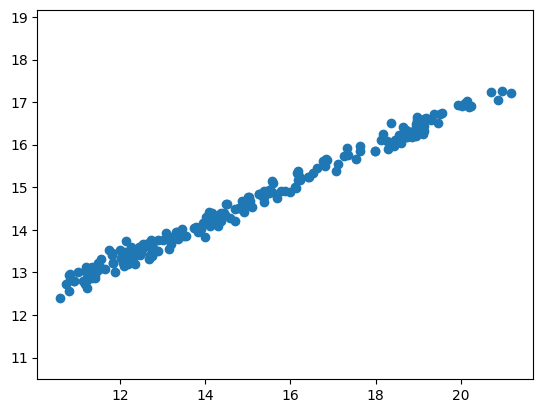

0.9943409310122264


In [9]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

grains_df=grains[:,:7]
grains_df=np.array(grains_df)

# Assign the 0th column of grains: width
width = grains_df[:,0]

# Assign the 1st column of grains: length
length = grains_df[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

You observed that the width and length measurements of the grain are correlated. Now, use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

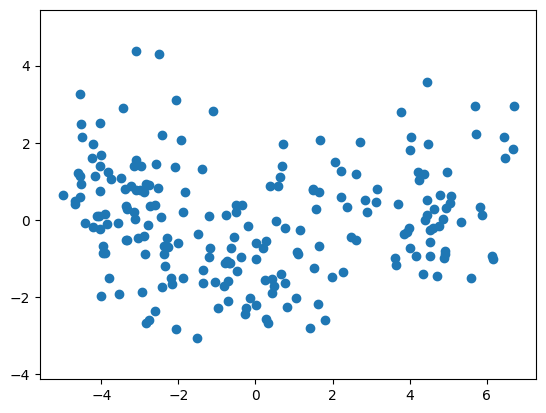

2.688821387764051e-17


In [10]:
# Import PCA
from sklearn.decomposition import PCA 

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains_df)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

## Intrinsic Dimension

Intrinsic dimension refers to the number of independent variables or features that are required to describe a dataset. It represents the minimum number of dimensions needed to capture the essential information or variability in the data.

In other words, the intrinsic dimensionality of a dataset determines the number of meaningful dimensions that contribute to the structure of the data.

The intrinsic dimension can be estimated using various techniques, such as PCA (Principal Component Analysis) by identifiying the feautures with significant variance.

Estimating the intrinsic dimension can help in dimensionality reduction, feature selection, and understanding the underlying structure of the data.

## Plotting the Variances of PCA Features

Recall PCA identifies intrinsic dimension when samples have any number of features. 
Intrinsic dimension = number of PCA features with significant variance:

```
 # Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()
```
![image-10](image-10.png)

This is the direction in which the grain data varies the most.

## Variance of the PCA features

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out

```
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
```

![image-11](image-11.png)

It looks like PCA features 0 and 1 have significant variance.


### Reducing Dimensions Using PCA

Need to denote how many features to keep with ```n_components```

```
# Import PCA
from sklearn.decomposition import PCA 

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

<script.py> output:
    (85, 2)
```
i.e. successfully reduced the dimensionality from 6 to 2.
    
    

## Non-Negative Matrix Factorization (NMF)

Non-Negative Matrix Factorization (NMF) is a dimensionality reduction technique that is particularly useful for non-negative data. It factorizes a non-negative matrix into the product of two non-negative matrices, which can be interpreted as basis vectors and coefficients.

NMF can be used for feature extraction, where the basis vectors represent the underlying patterns in the data, and the coefficients represent the contribution of each pattern to the original data points. NMF is interpretable unlike PCA.

Example of how to use NMF:

```python
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model with 2 components: nmf
nmf = NMF(n_components=2)

# Fit the NMF model to the non-negative data
nmf.fit(non_negative_data)

# Transform the non-negative data: nmf_features
nmf_features = nmf.transform(non_negative_data)

# Print the shape of nmf_features
print(nmf_features.shape)
```


## Recommender Systems using NMF

Recommender systems are algorithms that provide personalized recommendations to users based on their preferences and behavior. Non-Negative Matrix Factorization (NMF) can be used to build recommender systems.

Example of how to define a recommender system using NMF, including building a pipeline and transforming the array into normalized NMF features:

```python
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

```
Suppose you were a big fan of Bruce Springsteen - which other musical artists might you like? Use NMF features and the cosine similarity to find similar musical artists.

```
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000
Neil Young           0.956
Van Morrison         0.872
Leonard Cohen        0.865
Bob Dylan            0.859
dtype: float64

```

